<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=200 height=150 />


# EXAMEN RECUPERACIÓN PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Endara Carrillo, Daniela Natasha** 


# RIBOSOMAS

Los ribosomas son la maquinaria celular dónde se sintetizan las proteínas. Un ribosoma es un gran complejo macromolecular compuesto por más de 50 proteínas diferentes (proteínas ribosómicas) y varias moléculas de ARN denominadas ARN ribosómicos (ARNr). Los ribosomas miden entre 15 y 30 nanómetros de diámetro, por lo que sólo son visibles con el microscópio electrónico. (Rodirguez, et al.2012). 

<img src="http://4.bp.blogspot.com/-8nHYSflXpz8/UuHSm0OuXZI/AAAAAAAAaCw/F9P6LqfEA9A/s1600/Polirribosomas.jpg" width=500 height=300 />

### ESTRUCTURA DEL RIBOSOMA 

La estructura general de los ribosomas procarióticos y eucarióticos consta de una subunidad pequeña, una subunidad grande y dos sedes, la sede aminoacídica (Sede A) lugar de entrada de los ARN-t cargados con un aminoácido (aminoacil-ARN-t) y la sede peptídica (Sede P) lugar en el que se encuentran los ARN-t cargados con un péptido (peptidil-ARN-t).(Dincova & Sánchez, 2010). 

<img src="http://www7.uc.cl/sw_educ/biologia/bio100/imagenes/7853dc34af7filenameFA310typeimagejpeg.jpg" width=400 height=300 />

### EL PROCESO DE TRADUCCIÓN Y EL RIBOSOMA 

Las subunidades ribosomales llevan a cabo distintas funciones durante la síntesis de proteínas, la subunidad ribosomal pequeña interacciona con el ARNm durante el inicio de la traducción y decodifica el mensaje (Gualerzi, et al.,2000). El ARNm contiene tres nucleotidos llamados codones que seran las instrucciones para formar la proteina. En la traducción, los codones de un ARNm se leen mediante los ARNt,  ya que contiene el centro de decodificación el cual se asegura que el tRNA con el anticodón correcto este unido al ribosoma y se aparee con el codón del mRNA. Por otro lado, la subunidad grande cataliza la formación del enlace peptídico (Steitz & Moore, 2003) mediante el centro de peptidiltransferasa (PTC, por sus siglas en inglés). La función y calidad de los ribosomas determinan la eficiencia de traduccción. La célula no solo necesita la cantidad correcta de ribosomas, sino que además aquellos ribosomas producidos deben funcionar correctamente (van de Peer et al., 1999).

<img src="http://www7.uc.cl/sw_educ/biologia/bio100/imagenes/78a3dc34afcfilenameFA315typeimagejpeg.jpg" width=500 height=300 />

El siguiente trabajo consiste en hacer un minado datos en busca de genes relacionadas a cancer que tendan que ver con las subunidades ribosomales en este caso nos centraremos enla ribunidades ribosomales pequeñas. Para llevar a cabo esta actividadad, se hara uso de herramientas bioinformaticas...

### BIOPYTHON 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Biopython_logo.png/490px-Biopython_logo.png" width=300 height=250 />

Son programas informáticos que se usan para cuantificar y hacer cálculos con datos biológicos. Su objetivo principal es el de desarrollar el mayor número posible de bibliotecas informáticas basadas en el lenguaje de programación Python, que tengan aplicaciones bioinformáticas. 

## PREGUNTA 1

In [ ]:
https://github.com/Danielanatasha/2022_Recuperacion.git

## PREGUNTA 2 

In [4]:
! pip install biopython

In [32]:
## primero importamos los paquetes necesarios para realizar las actividades
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Entrez
import re
import os 
from Bio.Align.Applications import ClustalwCommandline

## se realiza una busqueda en la base de datos en https://www.genenames.org/data/genegroup/#!/group/1054 
## y elegimos los genes que codificab a las proteinas ribosomales S ribosomal proteins y obtenemos 
## los codigos del genbank. Creamos un lista con el conjunto de id de los genes de estas proteinas. 

id_total = ["NM_002295", "NM_002952", "NM_001005", "NM_001006", "NM_001007", "NM_001008", "NM_001039567", "NM_001009", "NM_001010", "NM_001011",  
            "NM_001012", "NM_001013", "NM_001014", "NM_001015", "NM_001016", "NM_001017", "NM_001025071", "NM_001018", "NM_001019", "NM_001020"]

out_sequence = open("secuencias1.gb", "w")


## se crea listas vacias para posteriormente guardar los resultados que me arrojaran 
## la ejecucion de los codigos siguientes. 
records = []
comentarios = []
l_celula_sana = []
l_celula_enferma = []
seq_enferma = []
seq_sana = []
id_enferma = []
id_sana = []

In [33]:
## Ingreamos al Entrez, siempre identificandonos quien ingresa hacer la busqueda de datos,
## para luego descarga del genbank en formato gb las secuencias de los id obtenidas de 
##la busqueda. 

Entrez.email = "daniela.endara@est.ikiam.edu.ec" 
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= id_total
                  ) as handle: 
    for seq_record in SeqIO.parse(handle, "gb"): 
        out_sequence.write(str(seq_record)) 
        record = seq_record.annotations 
        records.append(record)
        comentarios.append(record["comment"])

        if "cancer" in record["comment"]:
            l_celula_enferma.append(len(seq_record))
            seq_enferma.append(repr(seq_record.seq))
            id_enferma.append(seq_record.id)
            print ("la secuencia", seq_record.id, "es una celula enferma")
        else: 
            l_celula_sana.append(len(seq_record))
            seq_sana.append(repr(seq_record.seq))
            id_sana.append(seq_record.id)
            print ("la secuencia", seq_record.id, "es una celula sana")
            

la secuencia NM_002295.6 es una celula enferma
la secuencia NM_002952.4 es una celula sana
la secuencia NM_001005.5 es una celula sana
la secuencia NM_001006.5 es una celula sana
la secuencia NM_001007.5 es una celula sana
la secuencia NM_001008.4 es una celula sana
la secuencia NM_001039567.3 es una celula sana
la secuencia NM_001009.4 es una celula enferma
la secuencia NM_001010.3 es una celula sana
la secuencia NM_001011.4 es una celula sana
la secuencia NM_001012.2 es una celula sana
la secuencia NM_001013.4 es una celula enferma
la secuencia NM_001014.5 es una celula enferma
la secuencia NM_001015.5 es una celula sana
la secuencia NM_001016.4 es una celula enferma
la secuencia NM_001017.3 es una celula sana
la secuencia NM_001025071.2 es una celula sana
la secuencia NM_001018.5 es una celula enferma
la secuencia NM_001019.5 es una celula sana
la secuencia NM_001020.6 es una celula sana


## PREGUNTA 3

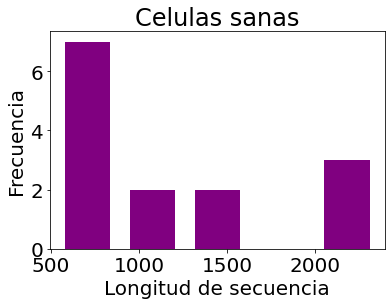

In [34]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(l_celula_sana, bins = 5, color = "purple", rwidth=0.7)
plt.title("Celulas sanas")
plt.xlabel("Longitud de secuencia")
plt.ylabel("Frecuencia")
plt.show()

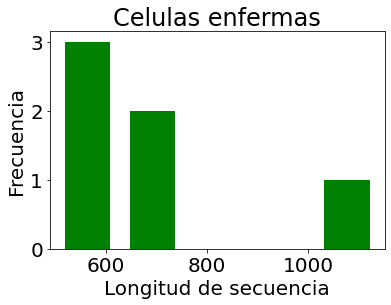

In [35]:
plt.hist(l_celula_enferma, bins = 5, color = "green", rwidth=0.7)
plt.title("Celulas enfermas")
plt.xlabel("Longitud de secuencia")
plt.ylabel("Frecuencia")
plt.show()

Se hizo el ploteo de dos histogramas con las longitudes de las secuencias; en el primero es relacionado a celulas sanas y el segundo a celuals enfermas. 

En el primer grafico se puede observar que la longitud de las secuencias de celulas sanas estan en un un rango 700 a 2300 gb. con frecuencias relativamente pequeñas. Por otro lado, en el grafico de ceulas enfermas podemos ver que la longitud de las secuencias estan en rangos de entre los 500 a los 1100 gb, pero con elevados indices de frecuencia, se puede decir que las secuencias mayores a 750 y  menores de 2300 gb se podrian considerar que serian celulas sanas a diferencia que si presentan una longitud de entre los 550 a loa 1100 se podria conciderar una celula enferma. Por otro lado en el minado de dato podemos observar que en esta subunidad pequeña los genes que codifican para un tipo de cancer es menor a las que codifican en celulas sanas, de los 20 secuencias selecionadas, se encontro que que 6 genes estan relacionados a celulas enfermas o cancer. Sin embago para poder separar estos datos de celulas sanas o efermas con un nivel mas alto de eficiencia, se tendria que colocar otros filtros que permitan al codigo indentificar estas variaciones. 

## PREGUNTA 4 

In [36]:
from Bio import Entrez
id_total = id_sana + id_enferma


out_sequence = open("secuencias1.fasta", "w")

for linea in id_total:  
    Entrez.email="daniela.endara@est.ikiam.edu.ec"
    handle=Entrez.efetch(db="nucleotide" ,id=linea ,rettype="fasta", retmode="text")
    data=(handle.read())
    out_sequence.write(data)
out_sequence.close()

In [37]:
## todo lo que me bote de secuencia . fasta se guradra en el 
## archivo data que esta contenido en el handle, el cual sirve para guardar informacion rapida de un archivo 
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "secuencias1.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
ClustalAlign = AlignIO.read("secuencias1.aln", "clustal")
print(ClustalAlign)
tree = Phylo.read("secuencias1.dnd", "newick")

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=secuencias1.fasta
Alignment with 20 rows and 2442 columns
--------------------------------------------...--- NM_001008.4
--------------------------------------------...--- NM_001039567.3
--------------------------------------------...--- NM_001007.5
--------------------------------------------...--- NM_001015.5
--------------------------------------------...--- NM_001016.4
---------CCTTTCCTTTCAGCGGAGCGCGGCGGCAAGATGGC...--- NM_001005.5
--------------------------------------------...--- NM_001011.4
CTCTTTCCGCCATCTTTCCGCGCCGGTGAGTAGCACTCTCTGAG...--- NM_001019.5
--------------------------------------------...--- NM_001018.5
--------------------------------------------...--- NM_001009.4
--------------------------------------------...--- NM_001012.2
--------------------------------------------...--- NM_001006.5
--------------------------------------------...--- NM_001017.3
--------------------------------------------...--- NM_002295.6


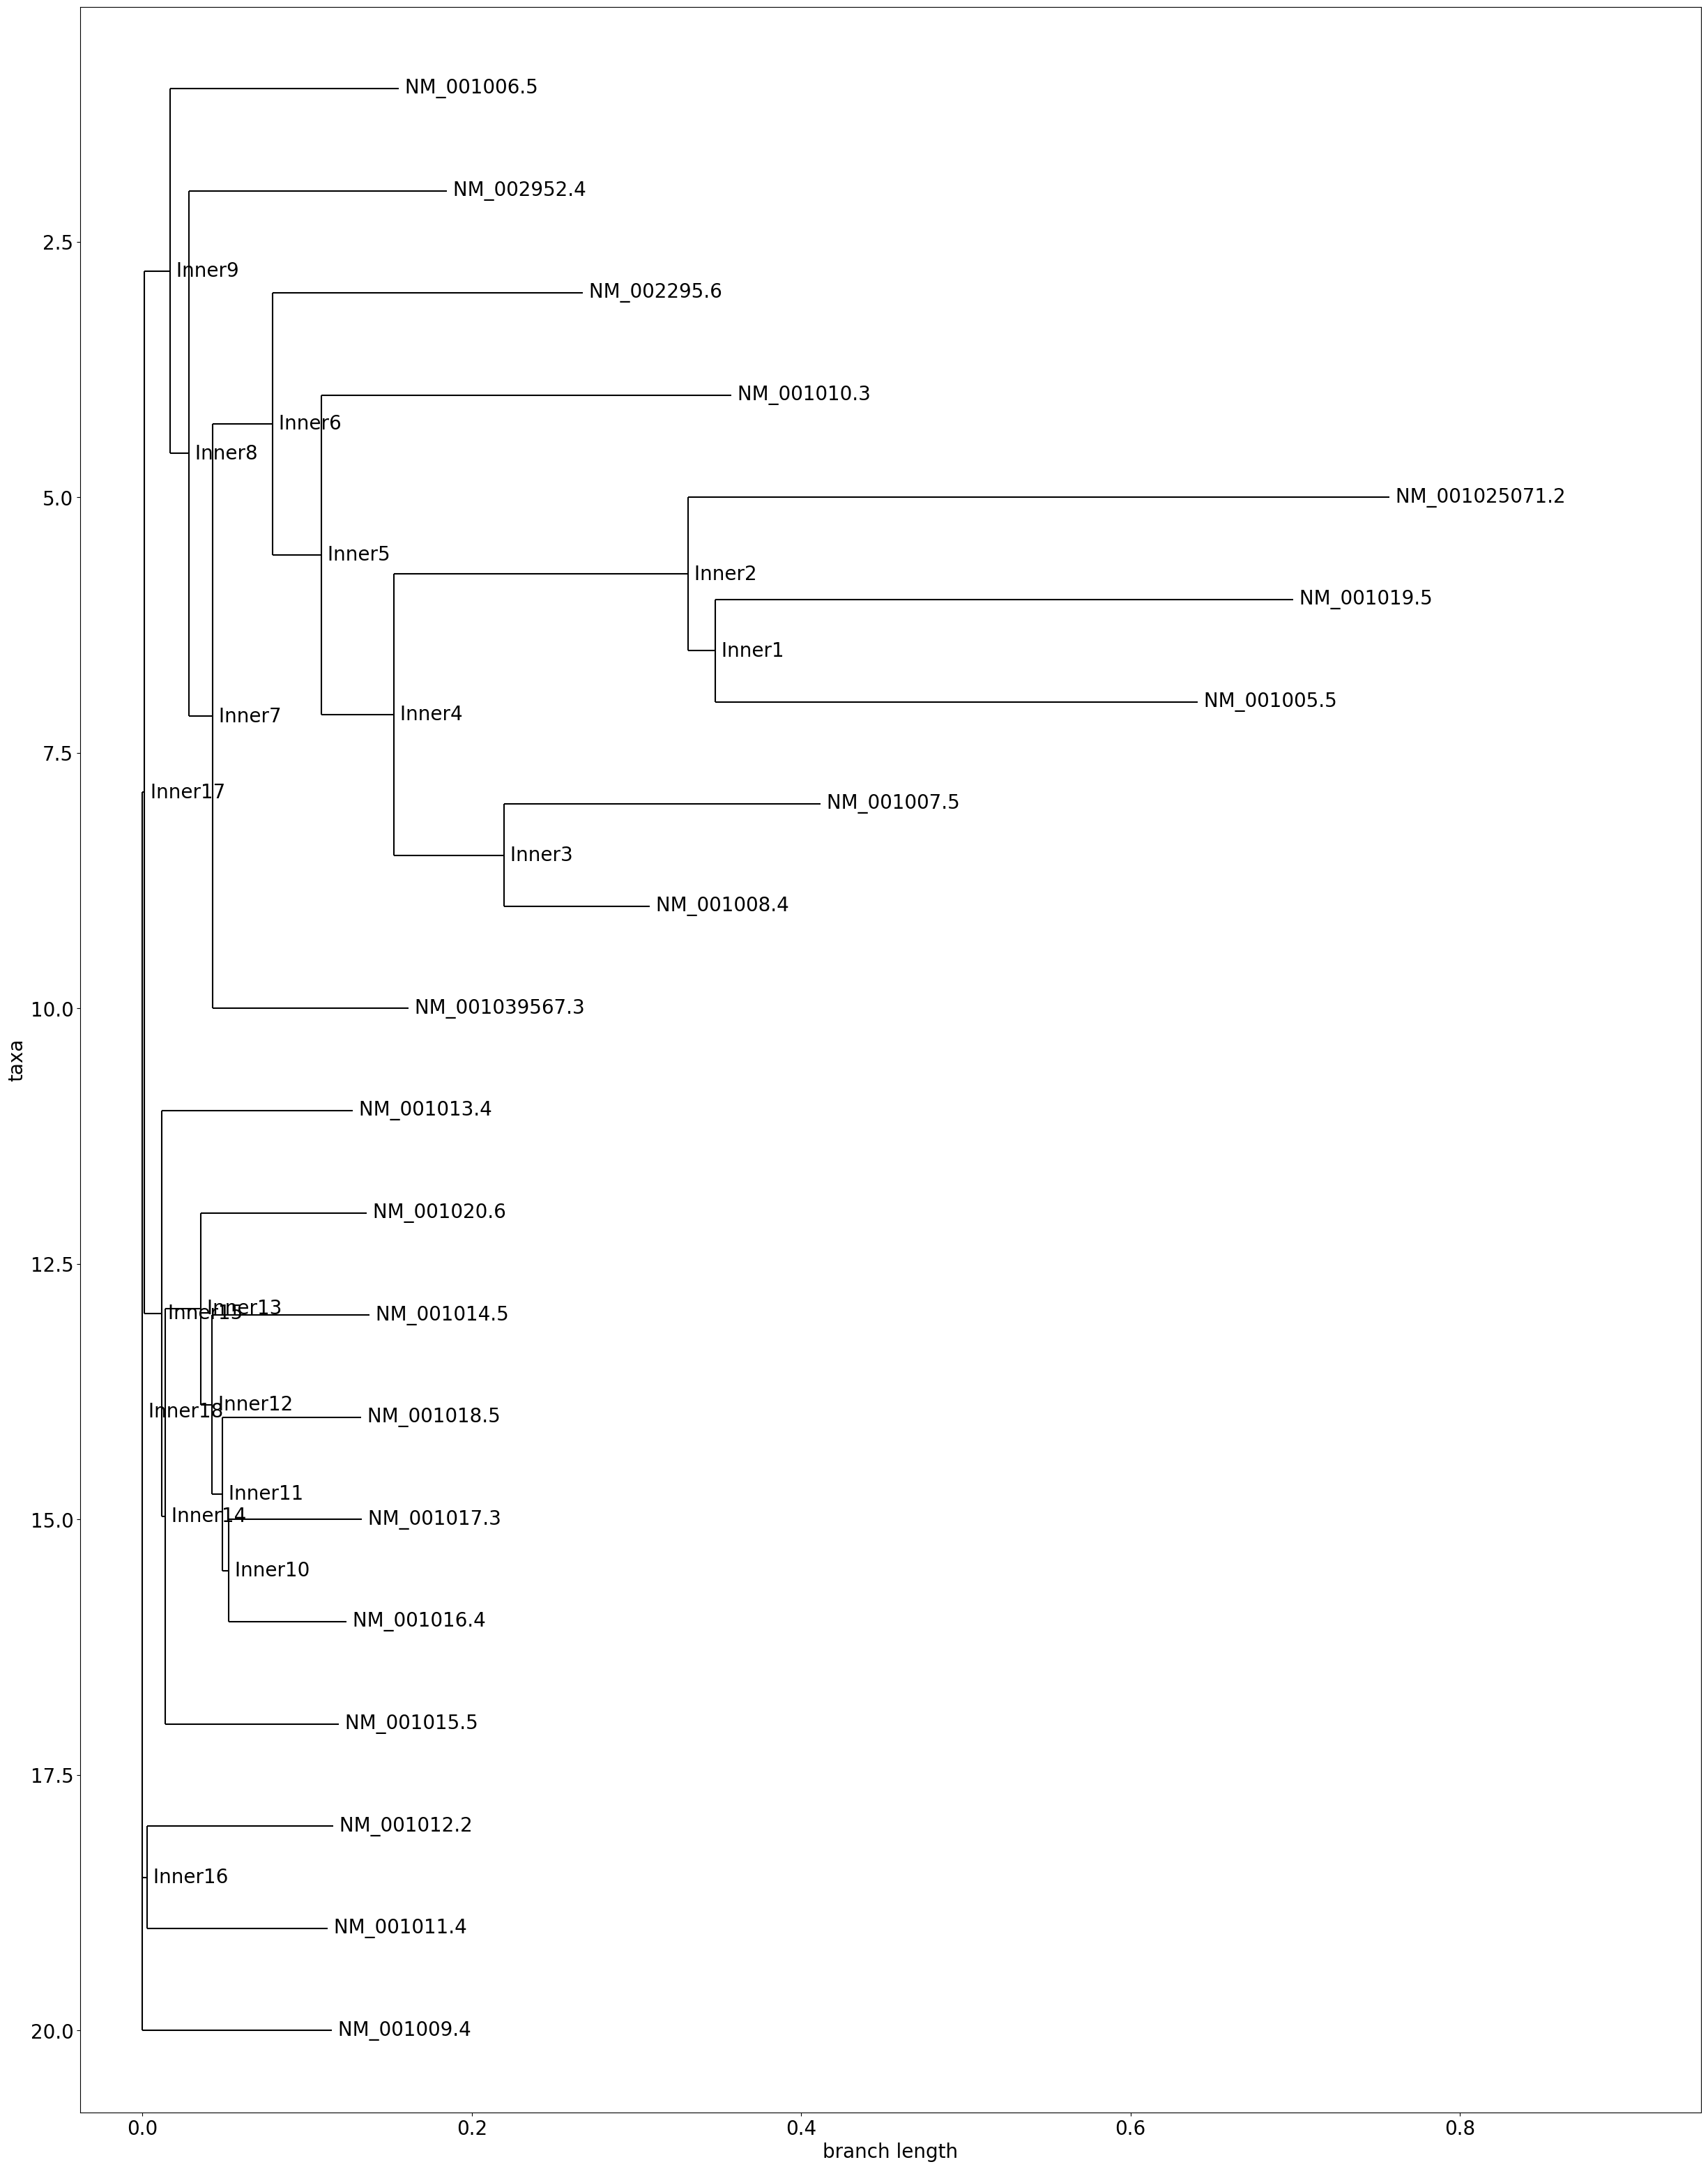

In [38]:
with open("secuencias1.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
    
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
 
distance_matrix = calculator.get_distance(alignment)


from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

# Construir el arbol 
align_total = constructor.build_tree(alignment)
align_total.rooted = True
Phylo.write(align_total, "align_protein_ribosomal.xml", "phyloxml")

align_protein_ribosomal = Phylo.read(file="align_protein_ribosomal.xml", format= "phyloxml")

# Arbol elemental en Matplotlib
import matplotlib
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(30, 40), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=20)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=20)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=20)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(align_protein_ribosomal, axes=axes)
fig.savefig("align_protein_ribosomal.jpg")

En el arbol se obtuvieron 20 secuencias de S Ribosomal proteins de la especie homo sapiens, y que los codigos que presentaron mayor divergencia fueron los NM_001025071.2 y NM_001019.5, es decir los que tuvieron mas pb variadas con respecto a las demas. 

### Referencia Bibliograficas 
* Rodriguez, A; Galindo, A & Perez, C. (2012). Biologia Celular. Terera edición. Universidad Autónoma de Sinaloa. Dirección General de Escuelas Preparatorias. Culiacán, Sinaloa, México.Recuperado de http://dgep.uas.uasnet.mx

* Dincova, D & Sanchez, E (2010). Ribosoma: lo que nos ha enseñado su estructura. https://doi.org/10.1016/S0187-893X(18)30079-X

* Gualerzi, C., Caserta, E., La Teana, A., Spurio, R., Tomsie, J., y Pon, C. (2000). Translation initiation in bacteria. In The ribosome: Structure, function, antibiotics, and cellular interactions (eds. R.A. Garrett et al.), ASM Press, Washington, D.C. pp. 477–494. 

* Steitz, T.A. y Moore, P.B. (2003). The structural basis of large ribosomal subunit function. Annu. Rev. Biochem. 72: 813-850.

* Ali, A., Wuyts, J., De Wachter, R., Meyer, A. y Van de Peer, Y. (1999). Construction of a variability map for eukaryotic large subunit ribosomal RNA. Nucleic Acids Research. 27: 2825-2831.